In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r
from preprocess_data import *
import preprocess_data
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [216]:
data_S_1 = pd.read_csv("../data/target/static_annotations_S.csv")

data_S = data_S_1.copy()

data_S = data_S.drop('std_arousal', 1).drop('std_valence', 1)
data_S['song_id'] = data_S['song_id'].apply(lambda x: str(x) + "S")
tmp = data_S['mean_arousal'].copy()
data_S['mean_arousal'] = data_S['mean_valence'].copy()
data_S['mean_valence'] = tmp.copy()

data_S = data_S.rename(columns={'mean_arousal':u'valence_mean', 'mean_valence':u'arousal_mean'})

In [217]:
data_S.head()

,song_id,valence_mean,arousal_mean
0,2S,3.0,3.1
1,3S,3.3,3.5
2,4S,5.5,5.7
3,5S,5.3,4.4
4,7S,6.4,5.8


In [218]:
data_S_1.head()

,song_id,mean_arousal,std_arousal,mean_valence,std_valence
0,2,3.1,0.99443,3.0,0.66667
1,3,3.5,1.84090,3.3,1.70290
2,4,5.7,1.49440,5.5,1.71590
3,5,4.4,2.11870,5.3,1.94650
4,7,5.8,1.54920,6.4,1.77640


In [219]:
data_D_1 = pd.read_csv("../data/target/static_annotations_averaged_songs_1_2000D.csv")
data_D_2 = pd.read_csv("../data/target/static_annotations_averaged_songs_2000_2058D.csv")
data_D_2 = data_D_2.drop(data_D_2.columns[[2, 3, 4, 5, 6, 8, 9, 10, 11, 12]], 1)
data_D_1 = data_D_1.drop(data_D_1.columns[[2, 4]], 1)
data_D = pd.concat([data_D_1, data_D_2], ignore_index=True)
data_D['song_id'] = data_D['song_id'].apply(lambda x: str(x) + "D")
data_D = data_D.rename(columns={' arousal_mean':'arousal_mean', ' valence_mean':u'valence_mean'})

In [220]:
list(data_D)

['song_id', u'valence_mean', 'arousal_mean']

In [221]:
data_D_1.head()

,song_id,valence_mean,arousal_mean
0,2,3.1,3.0
1,3,3.5,3.3
2,4,5.7,5.5
3,5,4.4,5.3
4,7,5.8,6.4


In [222]:
data_D_2.head()

,song_id,valence_mean,arousal_mean
0,2001,3.2,6.6
1,2002,6.4,5.2
2,2003,5.4,4.6
3,2004,5.0,4.8
4,2005,3.8,5.2


In [223]:
data_D.head()

,song_id,valence_mean,arousal_mean
0,2D,3.1,3.0
1,3D,3.5,3.3
2,4D,5.7,5.5
3,5D,4.4,5.3
4,7D,5.8,6.4


In [224]:
print len(data_D), len(data_D_1), len(data_D_2), len(result_data)

1802 1744 58 744


In [225]:
data_D.head()

,song_id,valence_mean,arousal_mean
0,2D,3.1,3.0
1,3D,3.5,3.3
2,4D,5.7,5.5
3,5D,4.4,5.3
4,7D,5.8,6.4


In [185]:
data_S.head()

,song_id,valence_mean,arousal_mean
0,2S,3.0,3.1
1,3S,3.3,3.5
2,4S,5.5,5.7
3,5S,5.3,4.4
4,7S,6.4,5.8


In [14]:
data_M = pd.read_csv("../data/labels/M.csv")
data_M = data_M.rename(columns={'label':u'song_id', 'arousal':u'arousal_mean', 'valence':u'valence_mean'})
data_D = pd.read_csv("../data/labels/D.csv", index_col = 0)
data_S = pd.read_csv("../data/labels/S.csv", index_col = 0)

In [9]:
result = pd.concat([data_D, data_S], ignore_index=True)

In [15]:
result_SDM = pd.concat([data_D, data_S, data_M], ignore_index=True)

In [16]:
print len(result_SDM)

4645


In [6]:
data_M

,label,valence,arousal
0,0M,1.466200,1.399992
1,1M,1.466312,2.183993
2,2M,1.466304,2.071993
3,3M,1.466312,2.183993
4,4M,1.466304,2.071993
5,5M,1.466184,1.175992
6,6M,1.466312,2.183993
7,7M,1.466312,2.183993
8,8M,7.765631,3.039994
9,9M,7.765511,2.071993


In [7]:
data_D

,song_id,valence_mean,arousal_mean
0,2D,3.10,3.00
1,3D,3.50,3.30
2,4D,5.70,5.50
3,5D,4.40,5.30
4,7D,5.80,6.40
5,8D,3.20,4.80
6,10D,4.00,4.70
7,12D,5.50,5.80
8,13D,3.20,4.00
9,17D,4.40,6.00


In [17]:
result_SDM

,song_id,valence_mean,arousal_mean
0,2D,3.100000,3.000000
1,3D,3.500000,3.300000
2,4D,5.700000,5.500000
3,5D,4.400000,5.300000
4,7D,5.800000,6.400000
5,8D,3.200000,4.800000
6,10D,4.000000,4.700000
7,12D,5.500000,5.800000
8,13D,3.200000,4.000000
9,17D,4.400000,6.000000


In [231]:
data_D.to_csv("../data/labels/D.csv")

In [232]:
data_S.to_csv("../data/labels/S.csv")

In [233]:
result.to_csv("../data/labels/audio_target.csv")

In [18]:
result_SDM.to_csv("../data/labels/audio_target_SDM.csv")

In [8]:
result = pd.read_csv("../data/labels/audio_target.csv", index_col=0)


In [19]:
result = pd.read_csv("../data/labels/audio_target_SDM.csv", index_col=0)

In [10]:
def create_labels_for_dataset(labels_file, new_labels_file, tracks_dir):
    """
    """
    tmp_df = np.asarray(pd.read_csv(labels_file))
    song_va = {i[1]:[i[2], i[3]] for i in tmp_df}
    
    tracks_filename = os.listdir(tracks_dir)
    songs_parts = {}
    for track in tracks_filename:
        filename, extension = os.path.splitext(track)
        
        song_id = filename.split("_")[0]
        if song_id not in songs_parts:
            songs_parts[song_id] = []
        songs_parts[song_id].append(track)
        
#     print song_va
#     print len(song_va)
#     print songs_parts
#     print len(songs_parts)
    
    new_labels = []
    for song in songs_parts.keys():
        if song in song_va:
            for part in songs_parts[song]:
                new_labels.append([part, song_va[song][0], song_va[song][1]])
                
#     print new_labels[:10]
    new_labels = np.asarray(new_labels)
#     print new_labels[:10]
#     print new_labels.shape
    
    tmp_df = pd.DataFrame(data = new_labels, columns= ["song_filename", "valence", "arousal"])
    tmp_df.to_csv(new_labels_file, index = False)
    
    
def train_val_split(csv_file):
    data = pd.read_csv(csv_file).values
    validate_sample_idx = {i:0 for i in r.sample(range(len(data)), int(len(data) * 0.08))}
    train_data = []
    validate_data = []
    for idx, sample in enumerate(data):
        if idx in validate_sample_idx:
            validate_data.append(sample)
        else:
            train_data.append(sample)
    
    filename, ext = os.path.splitext(csv_file)
    tmp_df = pd.DataFrame(data = train_data, columns= ["song_filename", "valence", "arousal"])
    tmp_df.to_csv(filename + "_train" + ext, index = False)
    
    tmp_df = pd.DataFrame(data = validate_data, columns= ["song_filename", "valence", "arousal"])
    tmp_df.to_csv(filename + "_val" + ext, index = False)

In [82]:
train_val_split("../data/labels/spectrs_10sec_labels.csv")

In [38]:
train_val_split("../data/balanced_labels_SDM_bootstrap5.csv")

In [84]:
t = pd.read_csv("../data/labels/spectrs_10sec_labels_train.csv")
t

,song_filename,valence,arousal
0,585D_1.png,4.0,4.2
1,585D_3.png,4.0,4.2
2,585D_2.png,4.0,4.2
3,585D_0.png,4.0,4.2
4,473S_1.png,5.5,7.1
5,473S_2.png,5.5,7.1
6,473S_0.png,5.5,7.1
7,473S_3.png,5.5,7.1
8,231S_2.png,5.6,4.1
9,231S_1.png,5.6,4.1


In [86]:
t = pd.read_csv("../data/labels/spectrs_10sec_labels_val.csv")
t

,song_filename,valence,arousal
0,473D_3.png,7.1,5.5
1,585S_2.png,4.2,4.0
2,585S_0.png,4.2,4.0
3,615D_0.png,3.2,5.0
4,1937D_2.png,4.3,3.9
5,615S_1.png,5.0,3.2
6,615S_0.png,5.0,3.2
7,1915D_1.png,6.3,6.5
8,399D_3.png,6.7,7.0
9,399S_2.png,7.0,6.7


In [76]:
create_labels_for_dataset("../data/labels/audio_target.csv", "../data/labels/spectrs_10sec_labels.csv", "../data/spectrs_10sec_new/")

In [77]:
pd.read_csv("../data/labels/spectrs_10sec_labels.csv")

,song_filename,valence,arousal
0,585D_1.png,4.0,4.2
1,585D_3.png,4.0,4.2
2,585D_2.png,4.0,4.2
3,585D_0.png,4.0,4.2
4,473S_1.png,5.5,7.1
5,473S_2.png,5.5,7.1
6,473S_0.png,5.5,7.1
7,473S_3.png,5.5,7.1
8,231S_2.png,5.6,4.1
9,231S_1.png,5.6,4.1


In [74]:
print result[result['song_id'] == '807D']

    song_id  valence_mean  arousal_mean
621    807D           4.8           6.5


# Balanced Data

In [4]:
data_D = np.asarray(pd.read_csv("../data/labels/D.csv"))
data_S = np.asarray(pd.read_csv("../data/labels/S.csv"))

all_data = np.asarray(pd.read_csv("../data/labels/audio_target.csv"))

In [7]:
all_data

array([[0, '2D', 3.1, 3.0],
       [1, '3D', 3.5, 3.3],
       [2, '4D', 5.7, 5.5],
       ..., 
       [2543, '997S', 6.7, 6.4],
       [2544, '999S', 5.9, 4.1],
       [2545, '1000S', 5.8889, 7.2222]], dtype=object)

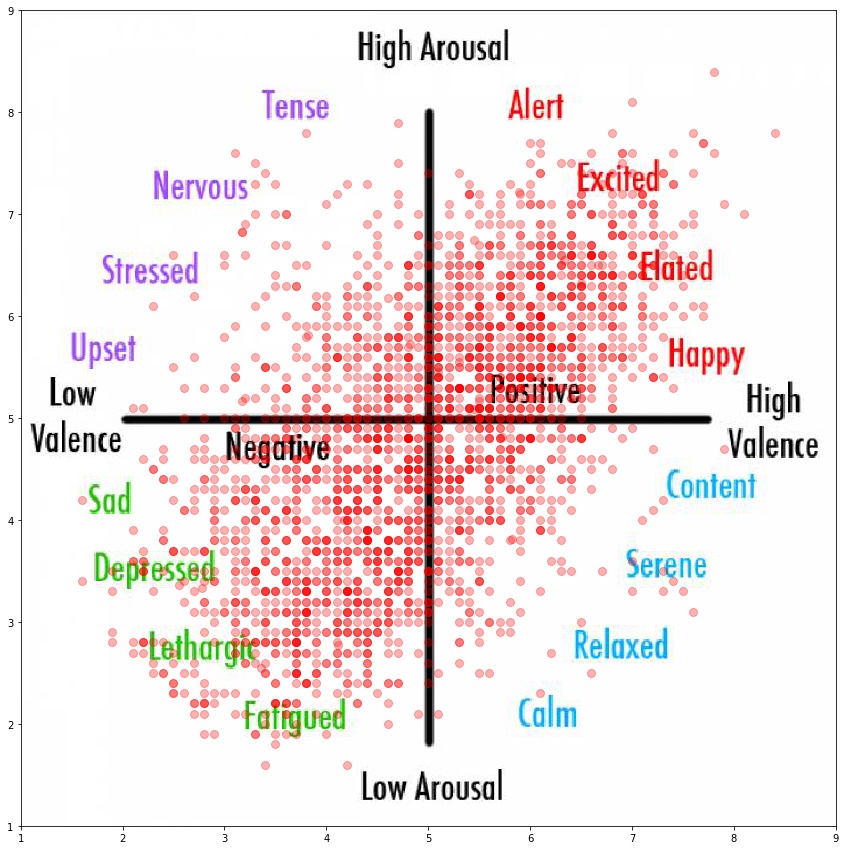

In [5]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
image = plt.imread('./va_scale.jpg')
plt.imshow(image, extent=[1, 9, 1, 9])

plt.plot(all_data[:, 2], all_data[:, 3], 'ro', markersize = '8', alpha = 0.3)
# for i, xy in enumerate(zip(data_D[:, 2], data_D[:, 3])):                         
#     ax.annotate(data_D[:, 1][i], xy, textcoords='data')
    
plt.show()

In [65]:
drop_border = [4.5, 5.5]
#sampling_border - diag y = 2 + x, y = 1 - x
new_points = []
for point in all_data:
    if drop_border[0] <= point[2] <= drop_border[1] and drop_border[0] <= point[3] <= drop_border[1]:
        continue
    if point[2] - 1 <= point[3] <= 2 + point[2]:
        need = np.random.binomial(1, 0.2)
        if need:
            new_points.append(point)
        continue
    new_points.append(point)
    
new_points = np.asarray(new_points)

In [66]:
print len(new_points)

535


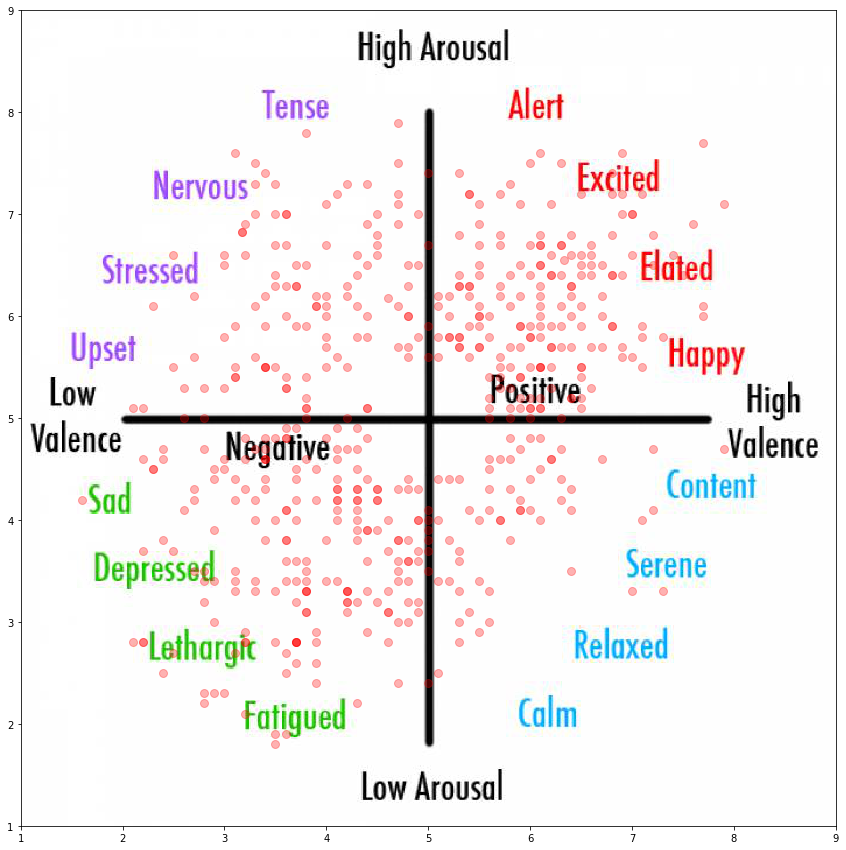

In [67]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
image = plt.imread('./va_scale.jpg')
plt.imshow(image, extent=[1, 9, 1, 9])

plt.plot(new_points[:, 2], new_points[:, 3], 'ro', markersize = '8', alpha = 0.3)
# for i, xy in enumerate(zip(data_D[:, 2], data_D[:, 3])):                         
#     ax.annotate(data_D[:, 1][i], xy, textcoords='data')
    
plt.show()

In [68]:
tmp_df = pd.DataFrame(data = new_points[:,1:], columns= ["song_filename", "valence", "arousal"])
tmp_df.to_csv("../data/balanced_audio_target.csv")

In [69]:
pd.read_csv("../data/balanced_audio_target.csv", index_col=0).values

array([['7D', 5.8, 6.4],
       ['8D', 3.2, 4.8],
       ['25D', 7.9, 4.7],
       ..., 
       ['995S', 2.4, 4.7],
       ['996S', 6.7, 6.0],
       ['999S', 5.9, 4.1]], dtype=object)

In [70]:
new_points[:,1:]

array([['7D', 5.8, 6.4],
       ['8D', 3.2, 4.8],
       ['25D', 7.9, 4.7],
       ..., 
       ['995S', 2.4, 4.7],
       ['996S', 6.7, 6.0],
       ['999S', 5.9, 4.1]], dtype=object)

In [5]:
preprocess_dir("../data/our_audio/", nb_secs=40)

[Errno 21] Is a directory: '../data/our_audio/.ipynb_checkpoints'
40
40
40
40
40
40
40
40


# Balanced after expand

In [19]:
all_data = np.asarray(pd.read_csv("../data/labels/audio_target_SDM.csv"))

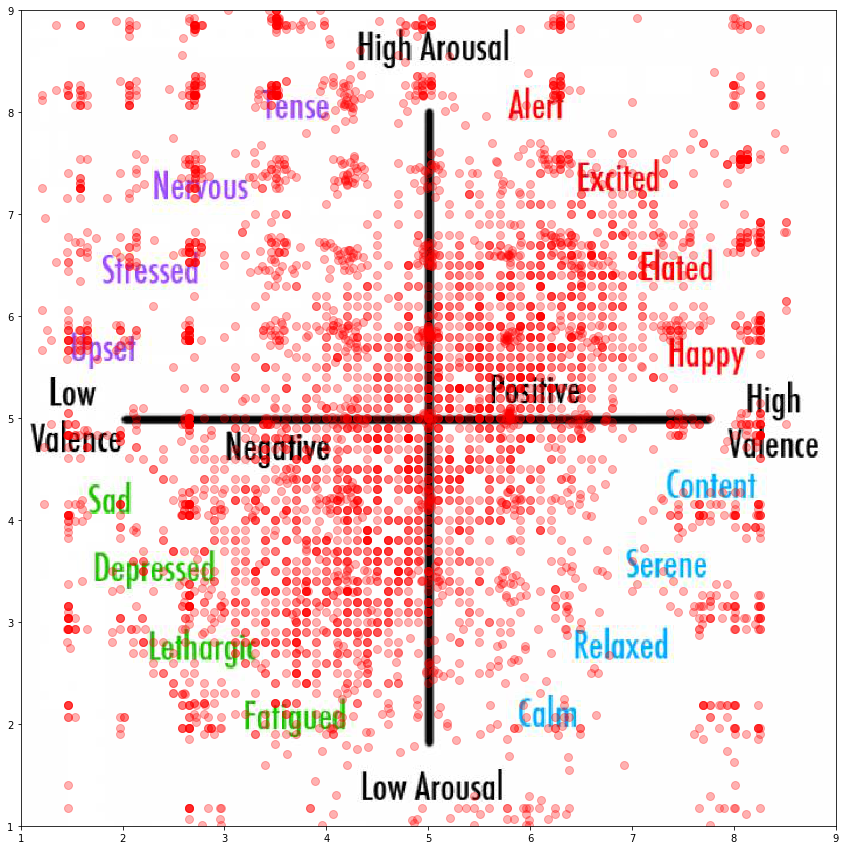

In [20]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
image = plt.imread('./va_scale.jpg')
plt.imshow(image, extent=[1, 9, 1, 9])

plt.plot(all_data[:, 2], all_data[:, 3], 'ro', markersize = '8', alpha = 0.3)
# for i, xy in enumerate(zip(data_D[:, 2], data_D[:, 3])):                         
#     ax.annotate(data_D[:, 1][i], xy, textcoords='data')
    
plt.show()

In [21]:
drop_border = [3.6, 6.5]
#sampling_border - diag y = 2 + x, y = 1 - x
new_points = []
for point in all_data:
    if drop_border[0] <= point[2] <= drop_border[1] and drop_border[0] <= point[3] <= drop_border[1]:
        continue
    if point[2] - 2 <= point[3] <= 2 + point[2]:
        need = np.random.binomial(1, 0.2)
        if need:
            new_points.append(point)
        continue
    new_points.append(point)
    
new_points = np.asarray(new_points)

In [22]:
print len(new_points), new_points[:10]

1733 [[5 '8D' 3.2 4.8]
 [16 '25D' 7.9 4.7]
 [21 '39D' 7.3 5.4]
 [25 '43D' 6.7 3.5]
 [27 '45D' 5.1 2.1]
 [47 '69D' 3.2 3.9]
 [50 '72D' 6.7 5.6]
 [62 '85D' 7.1 6.2]
 [64 '87D' 5.3 2.6]
 [73 '98D' 4.3 2.7]]


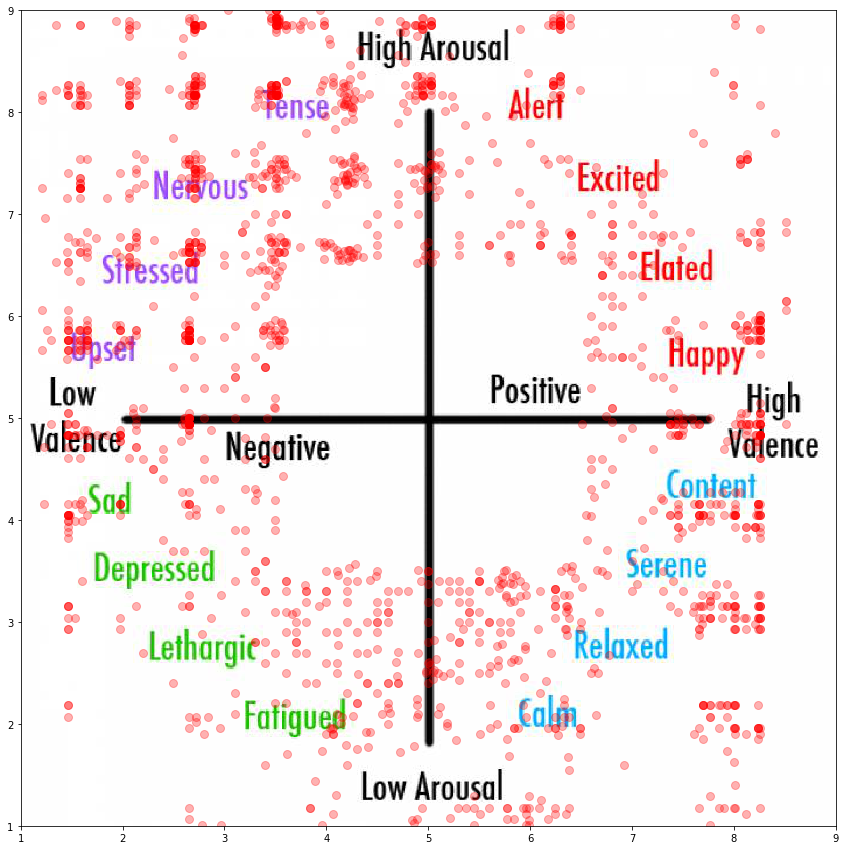

In [23]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
image = plt.imread('./va_scale.jpg')
plt.imshow(image, extent=[1, 9, 1, 9])

plt.plot(new_points[:, 2], new_points[:, 3], 'ro', markersize = '8', alpha = 0.3)
# for i, xy in enumerate(zip(data_D[:, 2], data_D[:, 3])):                         
#     ax.annotate(data_D[:, 1][i], xy, textcoords='data')
    
plt.show()

In [24]:
tmp_df = pd.DataFrame(data = new_points[:,1:], columns= ["song_filename", "valence", "arousal"])
tmp_df.to_csv("../data/balanced_audio_target_SDM_1.csv")

In [ ]:
preprocess_dir("/mnt/hdd/music_map_project/audio/", nb_secs=30)

/mnt/hdd/music_map_project audio
/mnt/hdd/music_map_project/preprocess_data_audio


Process PoolWorker-89:
Process PoolWorker-82:
Process PoolWorker-78:
Process PoolWorker-79:
Process PoolWorker-81:
Process PoolWorker-93:
Process PoolWorker-92:
Process PoolWorker-88:
Process PoolWorker-87:
Process PoolWorker-91:
Process PoolWorker-86:
Process PoolWorker-80:
Process PoolWorker-84:
Process PoolWorker-85:
Process PoolWorker-83:
Process PoolWorker-90:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/opt

Process PoolWorker-103:
Process PoolWorker-98:
Process PoolWorker-105:
Process PoolWorker-104:
Process PoolWorker-106:
Traceback (most recent call last):
Process PoolWorker-94:
Process PoolWorker-100:
Process PoolWorker-97:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Process PoolWorker-95:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/opt/anaconda2/lib/python2.7/multip

  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
    self.run()
    self.run()
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
    self.run()
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/opt/anaconda2/lib/python2.7/multiprocessing/pool.py", line 102, in worker
  File "/opt/anaconda2/lib/python2.7/multiprocessing/proce

    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda2/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    task = get()
  File "/opt/anaconda2/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    task = get()
    task = get()
    task = get()
  File "/opt/anaconda2/lib/python2.7/multiprocessing/queues.py", line 376, in get
  File "/opt/anaconda2/lib/python2.7/multiprocessing/pool.py", line 102, in worker
  File "/opt/anaconda2/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    task = get()
    task = get()
    task = get()
    task = get()
  File "/opt/anaconda2/lib/python2.7/multiprocessing/queues.py", line 376, in get
  File "/opt/anaconda2/lib/python2.7/multiprocessing/queues.py", line 376, in get
    racquire()
  File "/opt/anaconda2/lib/python2.7/multiprocessing/queues.py", line 376, in get
    task = get()
  File "/opt/anaconda2/lib/python2.7/multiprocessing/queues.py", line 376, in ge

Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
    self.run()
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    s

    self._target(*self._args, **self._kwargs)
    self.run()
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
Traceback (most recent call last):
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/opt/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/opt/anaconda2/lib/python2.7/multiprocessing/pool.py",

In [26]:
preprocess_data.create_labels_for_dataset("../data/balanced_audio_target_SDM_1.csv", "../data/balanced_labels_SDM_1.csv", \
                                          "/mnt/hdd/music_map_project/preprocess_data_audio/spectrs")

In [37]:
preprocess_data.create_labels_for_dataset("../data/balanced_audio_target_SDM_1.csv", \
                                          "../data/balanced_labels_SDM_bootstrap5.csv", \
                                          "/mnt/ssd/musicmap_data/20sec_expand_bootstrap/spectro5")

In [39]:
df = pd.read_csv("../data/balanced_labels_SDM_bootstrap5_train.csv")

In [40]:
len(df)

5382

In [17]:
df = df.values
print df

[['29M_0.png' 2.06219306219 7.15999816]
 ['473D_0.png' 7.1 5.5]
 ['1360D_0.png' 5.5 2.9]
 ['1965M_0.png' 8.25066325066 4.831995832]
 ['2041D_1.png' 4.4 3.0]
 ['351M_0.png' 8.20734320734 3.93599493599]
 ['894M_0.png' 1.4666564666600002 4.831995832]
 ['128D_0.png' 3.6 4.0]
 ['68S_0.png' 4.9 3.8]
 ['1544M_0.png' 6.22713322713 8.263999264]
 ['1424D_0.png' 4.5 3.5]
 ['2038D_7.png' 4.0 3.8]
 ['1088M_0.png' 5.0803960804 2.6383136383099997]
 ['403M_0.png' 2.70699370699 7.15999816]
 ['472M_0.png' 2.70244970245 8.819919819919999]
 ['2008D_2.png' 5.6 3.6]
 ['2008D_1.png' 5.6 3.6]
 ['369M_0.png' 8.12094312094 3.93599493599]
 ['953M_0.png' 4.21009121009 6.64470964471]
 ['1409D_0.png' 4.9 3.7]
 ['815M_0.png' 4.33622733623 2.57952157952]
 ['996S_0.png' 6.7 6.0]
 ['2047D_6.png' 6.2 5.0]
 ['2047D_3.png' 6.2 5.0]
 ['754M_0.png' 3.4544584544599997 8.891919891919999]
 ['8D_0.png' 3.2 4.8]
 ['899M_0.png' 1.4666644666600002 5.047996048]
 ['378M_0.png' 1.4665364665399998 3.93599493599]
 ['1037M_0.png' 4.0362

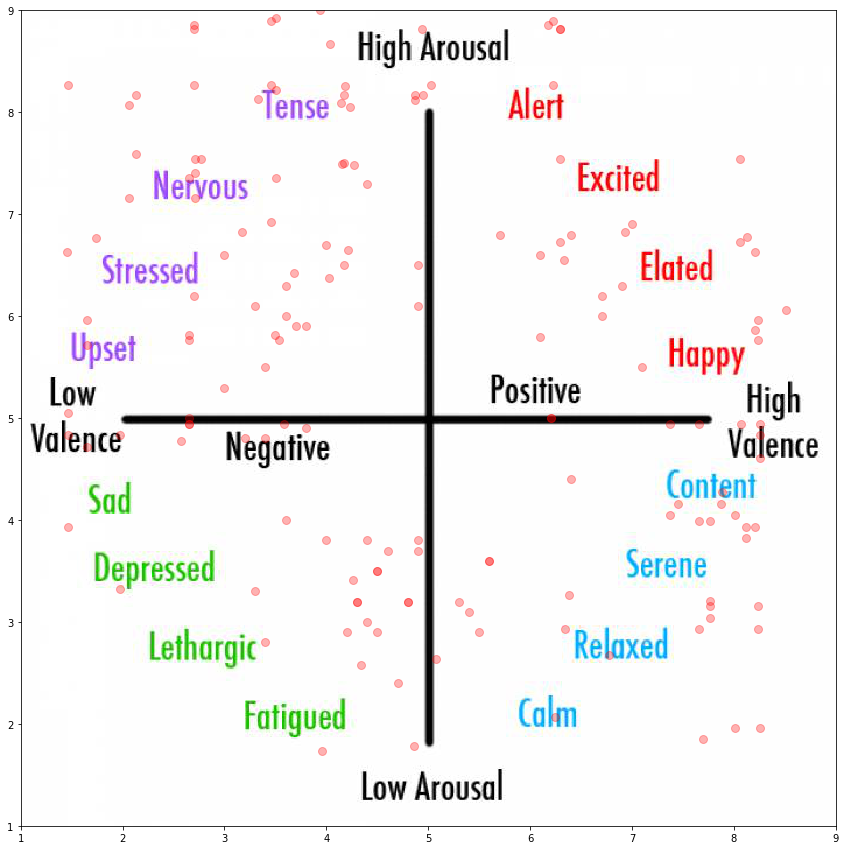

In [18]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
image = plt.imread('./va_scale.jpg')
plt.imshow(image, extent=[1, 9, 1, 9])

plt.plot(df[:, 1], df[:, 2], 'ro', markersize = '8', alpha = 0.3)
# for i, xy in enumerate(zip(data_D[:, 2], data_D[:, 3])):                         
#     ax.annotate(data_D[:, 1][i], xy, textcoords='data')
    
plt.show()